In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
from transformers import TFRobertaModel
import pandas as pd
import numpy as np
from transformers import BertTokenizer
from sklearn.metrics import mean_squared_error, mean_absolute_error

tokenizer_save_path = '/content/drive/MyDrive/tokenizer/'


tokenizer = BertTokenizer.from_pretrained(tokenizer_save_path)

# 데이터 로드
file_path = '/content/drive/MyDrive/val_noun_df.csv'
model_path_pre = '/content/drive/MyDrive/불용어제거이후모델/rm_stopwrd_base_256_'
def remove_nouns(text, nouns):
    for noun in nouns:
        text = text.replace(noun, '')
    return text

for index, row in df.iterrows():
  nouns_list = row['NOUNS'].split('_SEP_')
  df.at[index, 'paragraphs'] = remove_nouns(row['paragraphs'], nouns_list)

In [ ]:
test_target = ['대안제시', '글짓기', '찬성반대', '주장', '설명글']

for target in test_target:

  model_path = model_path_pre+f'{target}.h5'  # 모델 경로 지정
  model = load_model(model_path, custom_objects={'TFRobertaModel': TFRobertaModel})
  df = pd.read_csv(file_path)
  df = df[df['class']==target]

  paragraphs = df['paragraphs'].values
  scores = df['score'].values
  max_length = 512
  X_ids = np.zeros((len(paragraphs), max_length))
  X_mask = np.zeros((len(paragraphs), max_length))

  for i, paragraph in enumerate(paragraphs):
      tokens = tokenizer.encode_plus(paragraph, max_length=max_length, truncation=True,
                                    padding='max_length', add_special_tokens=True,
                                    return_tensors='tf')
      X_ids[i, :] = tokens['input_ids']
      X_mask[i, :] = tokens['attention_mask']

  predictions = model.predict([X_ids, X_mask])


  mse = mean_squared_error(scores, predictions)
  mae = mean_absolute_error(scores, predictions)
  rmse = np.sqrt(mse)

  print('불용어 제거 후 모델 성능 평가')
  print(f'{target}의 성능')
  print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
  print(f'======================================')

29/29 [==============================] - 38s 1s/step
불용어 제거 후 모델 성능 평가
대안제시의 성능
MSE: 40.975307834544445, MAE: 4.448691100115203, RMSE: 6.401195812857504
21/21 [==============================] - 29s 1s/step
불용어 제거 후 모델 성능 평가
글짓기의 성능
MSE: 45.589908160802786, MAE: 3.9905332569393126, RMSE: 6.752029928903069
31/31 [==============================] - 40s 1s/step
불용어 제거 후 모델 성능 평가
찬성반대의 성능
MSE: 47.44617187661635, MAE: 4.468396201491044, RMSE: 6.888118166568889
47/47 [==============================] - 60s 1s/step
불용어 제거 후 모델 성능 평가
주장의 성능
MSE: 58.31462836213272, MAE: 5.303009699930387, RMSE: 7.636401532275049
58/58 [==============================] - 74s 1s/step
불용어 제거 후 모델 성능 평가
설명글의 성능
MSE: 17.725752766913885, MAE: 3.18753626543037, RMSE: 4.210196286031553


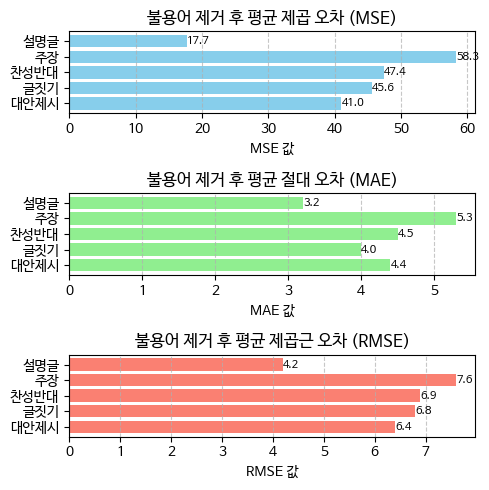

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 나눔 폰트 설정 (Google Colab 환경에서의 예시)
plt.rc('font', family='NanumBarunGothic')

# Data for the new graphs (소수점 첫째 자리까지 변경)
tasks = ['대안제시', '글짓기', '찬성반대', '주장', '설명글']
mse_new = [41.0, 45.6, 47.4, 58.3, 17.7]
mae_new = [4.4, 4.0, 4.5, 5.3, 3.2]
rmse_new = [6.4, 6.8, 6.9, 7.6, 4.2]

# Create figure and set axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 5))

# Plot MSE for new data
bars_mse_new = axes[0].barh(tasks, mse_new, color='skyblue')
axes[0].set_title('불용어 제거 후 평균 제곱 오차 (MSE)')
axes[0].set_xlabel('MSE 값')

# Plot MAE for new data
bars_mae_new = axes[1].barh(tasks, mae_new, color='lightgreen')
axes[1].set_title('불용어 제거 후 평균 절대 오차 (MAE)')
axes[1].set_xlabel('MAE 값')

# Plot RMSE for new data
bars_rmse_new = axes[2].barh(tasks, rmse_new, color='salmon')
axes[2].set_title('불용어 제거 후 평균 제곱근 오차 (RMSE)')
axes[2].set_xlabel('RMSE 값')

# Add grid
for ax in axes:
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add numbers next to bars
def add_numbers(bars, axes):
    for bar, value in zip(bars, [round(rect.get_width(), 1) for rect in bars]):
        axes.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value}',
                  va='center', ha='left', fontsize=8, color='black')

add_numbers(bars_mse_new, axes[0])
add_numbers(bars_mae_new, axes[1])
add_numbers(bars_rmse_new, axes[2])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (23.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120903 files and direc